# Atividade Prática 2.1 - Cobertura Florestal

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 26 de janeiro de 2024
* Data limite de entrega: 01 de fevereiro de 2024


## Equipe
* Integrante 1: *Aurelio Aquino*
* Integrante 2: *Jailson Bina*
* Integrante 3: *Sthephany Costa*
* Integrante 4: *Erica Veras*
* Integrante 5: *Michelle de Carvalho*
* Integrante 6: *Fabiano Dolzanes*


## Contexto: Cobertura Florestal

Este conjunto de dados contém observações de árvores de quatro áreas da Floresta Nacional de Roosevelt, no Colorado. Todas as observações são variáveis cartográficas (sem sensoriamento remoto) de seções de floresta de 30 metros por 30 metros. Há mais de meio milhão de medições no total

## Base de Dados

Disponível em: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [2]:
df = pd.read_csv('covtype2 - covtype2.csv')

### Análise Exploratória

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. O atributo alvo é Cover_Type. A distribuição de classes no mesmo é uniforme?

In [3]:
len(df)

10000

In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
df['Cover_Type'].value_counts()

Cover_Type
4    1620
5    1583
2    1462
1    1375
7    1349
6    1349
3    1262
Name: count, dtype: int64

### Organização dos dados para treinamento

1. Remova os dados faltantes
2. Remova a coluna Cover_Type e atribua-a a uma variável Y
3. Atribua os demais valores do dataset a uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn

In [6]:
df = df.dropna()

In [7]:
X = df.drop(columns=['Cover_Type'])

In [8]:
Y = df['Cover_Type']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Treinamento de uma RNA MLP para o problema

1. Treine uma RNA MLP Classificadora para este problema com uma única camada e 10 neurônios  
    1.1 Utilize a função de ativação ReLU  
    1.2 Utilize o solver Adam    
    1.3 Imprima o passo a passo do treinamento    
    1.4 Utilize o número máximo de épocas igual a 100 

In [10]:
modelo = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=True, max_iter=100)

In [11]:
modelo.fit(X_train, Y_train)

Iteration 1, loss = 29.36119529
Iteration 2, loss = 29.13585667
Iteration 3, loss = 28.93862492
Iteration 4, loss = 27.04594058
Iteration 5, loss = 22.25237886
Iteration 6, loss = 11.86997778
Iteration 7, loss = 6.36268305
Iteration 8, loss = 4.41033635
Iteration 9, loss = 3.47178855
Iteration 10, loss = 2.97009841
Iteration 11, loss = 2.70271565
Iteration 12, loss = 2.52117064
Iteration 13, loss = 2.39016916
Iteration 14, loss = 2.29329766
Iteration 15, loss = 2.20714707
Iteration 16, loss = 2.13214347
Iteration 17, loss = 2.07540877
Iteration 18, loss = 2.02317402
Iteration 19, loss = 1.97909849
Iteration 20, loss = 1.95018479
Iteration 21, loss = 1.89117677
Iteration 22, loss = 1.83765417
Iteration 23, loss = 1.80545082
Iteration 24, loss = 1.78554724
Iteration 25, loss = 1.75865980
Iteration 26, loss = 1.70974560
Iteration 27, loss = 1.64995258
Iteration 28, loss = 1.62098744
Iteration 29, loss = 1.59756267
Iteration 30, loss = 1.58584512
Iteration 31, loss = 1.57187545
Iteration 3

/home/aurelioaquino/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, verbose=True)

## Aferição de Desempenho

2. Com o modelo em questão, após o treinamento, apresente:  
    2.1 Matriz de confusão para o conjunto de teste  
    2.2 Acurácia  
    2.3 F-Score Balanceado  
    2.4 Precisão  
    2.5 Revocação 

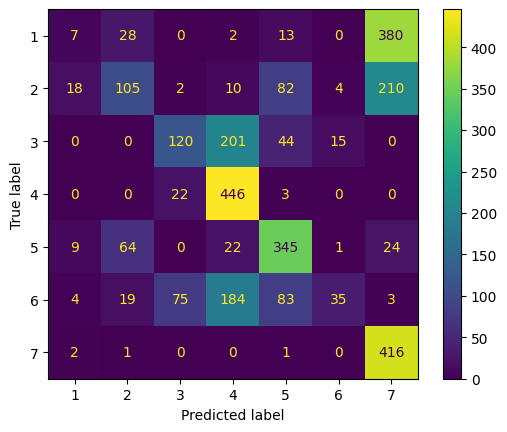

In [12]:
Y_prev = modelo.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_prev)

In [13]:
accuracy_score(Y_test, Y_prev)

0.49133333333333334

In [14]:
f1_score(Y_test, Y_prev, average='macro')

0.4019519641142847

In [15]:
precision_score(Y_test, Y_prev, average='macro')

0.48081435002234035

In [16]:
recall_score(Y_test, Y_prev, average='macro')

0.4774099694757768

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 75, 100] e [10, 15], tem-se que a grade é [(50,10), (50,15), (75,10), (75,15), (100,10), (100,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [17]:
neuron1 = [50, 75, 100]
neuron2 = [10, 15]

neurons = []
for i in neuron1:
  for j in neuron2:
    neurons.append((i,j))

neurons

[(50, 10), (50, 15), (75, 10), (75, 15), (100, 10), (100, 15)]

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameters = {
    'hidden_layer_sizes': neurons
}
searcher = GridSearchCV(MLPClassifier(verbose=True), parameters, verbose=True)
searcher.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Iteration 1, loss = 28.91535371
Iteration 2, loss = 18.72946829
Iteration 3, loss = 7.55357779
Iteration 4, loss = 3.21917733
Iteration 5, loss = 2.24697341
Iteration 6, loss = 2.05679347
Iteration 7, loss = 2.01225670
Iteration 8, loss = 1.99171080
Iteration 9, loss = 1.98185674
Iteration 10, loss = 1.97531712
Iteration 11, loss = 1.96916748
Iteration 12, loss = 1.96580666
Iteration 13, loss = 1.96094441
Iteration 14, loss = 1.95779000
Iteration 15, loss = 1.95460044
Iteration 16, loss = 1.95087058
Iteration 17, loss = 1.94788407
Iteration 18, loss = 1.94514618
Iteration 19, loss = 1.94315000
Iteration 20, loss = 1.94061835
Iteration 21, loss = 1.93887368
Iteration 22, loss = 1.93728845
Iteration 23, loss = 1.93640679
Iteration 24, loss = 1.93436248
Iteration 25, loss = 1.93364275
Iteration 26, loss = 1.93210200
Iteration 27, loss = 1.93242402
Iteration 28, loss = 1.93338245
Iteration 29, loss = 1.93093038
Iteration 30, loss 

/home/aurelioaquino/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 21.44414577
Iteration 3, loss = 6.58913112
Iteration 4, loss = 3.22691163
Iteration 5, loss = 2.44441971
Iteration 6, loss = 2.21916187
Iteration 7, loss = 2.15770908
Iteration 8, loss = 2.08372624
Iteration 9, loss = 2.05588691
Iteration 10, loss = 2.04035170
Iteration 11, loss = 2.01561185
Iteration 12, loss = 1.98662157
Iteration 13, loss = 1.96986648
Iteration 14, loss = 1.96920356
Iteration 15, loss = 1.95751431
Iteration 16, loss = 1.95011196
Iteration 17, loss = 1.95035310
Iteration 18, loss = 1.94415500
Iteration 19, loss = 1.94387085
Iteration 20, loss = 1.94544394
Iteration 21, loss = 1.94206802
Iteration 22, loss = 1.94192816
Iteration 23, loss = 1.93848838
Iteration 24, loss = 1.93657292
Iteration 25, loss = 1.93537295
Iteration 26, loss = 1.93833843
Iteration 27, loss = 1.93692285
Iteration 28, loss = 1.93455883
Iteration 29, loss = 1.93419571
Iteration 30, loss = 1.93310192
Iteration 31, loss = 1.93539683
Iteration 32, loss = 1.93420510
Iteration 33, l

/home/aurelioaquino/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 28.56495403
Iteration 2, loss = 23.53085355
Iteration 3, loss = 8.75801045
Iteration 4, loss = 4.74593452
Iteration 5, loss = 3.63695756
Iteration 6, loss = 3.04602399
Iteration 7, loss = 2.70115227
Iteration 8, loss = 2.56295814
Iteration 9, loss = 2.39380313
Iteration 10, loss = 2.27309683
Iteration 11, loss = 2.20603922
Iteration 12, loss = 2.08468740
Iteration 13, loss = 2.05593330
Iteration 14, loss = 2.03048053
Iteration 15, loss = 2.01452812
Iteration 16, loss = 2.01676147
Iteration 17, loss = 2.02543626
Iteration 18, loss = 2.01903854
Iteration 19, loss = 1.99856081
Iteration 20, loss = 2.01536582
Iteration 21, loss = 1.99917621
Iteration 22, loss = 1.98174951
Iteration 23, loss = 1.97339518
Iteration 24, loss = 1.98423518
Iteration 25, loss = 1.96066946
Iteration 26, loss = 1.94988224
Iteration 27, loss = 1.94598689
Iteration 28, loss = 1.94225359
Iteration 29, loss = 1.93821089
Iteration 30, loss = 1.94068583
Iteration 31, loss = 1.93857232
Iteration 32, l

/home/aurelioaquino/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 14.70432302
Iteration 5, loss = 11.89359259
Iteration 6, loss = 9.43673733
Iteration 7, loss = 8.03031535
Iteration 8, loss = 6.75303659
Iteration 9, loss = 5.93160964
Iteration 10, loss = 5.98441764
Iteration 11, loss = 4.90656157
Iteration 12, loss = 4.17059127
Iteration 13, loss = 4.10171786
Iteration 14, loss = 3.45912390
Iteration 15, loss = 3.54128521
Iteration 16, loss = 3.37316374
Iteration 17, loss = 3.01693553
Iteration 18, loss = 2.81586908
Iteration 19, loss = 2.73107590
Iteration 20, loss = 2.60960269
Iteration 21, loss = 2.51602671
Iteration 22, loss = 2.87094758
Iteration 23, loss = 2.24850222
Iteration 24, loss = 2.39782788
Iteration 25, loss = 2.49512440
Iteration 26, loss = 2.26581784
Iteration 27, loss = 2.61556220
Iteration 28, loss = 2.43278388
Iteration 29, loss = 2.18366682
Iteration 30, loss = 2.00269786
Iteration 31, loss = 1.97463513
Iteration 32, loss = 2.61191311
Iteration 33, loss = 2.25181924
Iteration 34, loss = 1.87703563
Iteration 35

/home/aurelioaquino/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.62084158
Iteration 2, loss = 2.64633702
Iteration 3, loss = 1.99931824
Iteration 4, loss = 1.97449850
Iteration 5, loss = 1.96845534
Iteration 6, loss = 1.96432747
Iteration 7, loss = 1.96065977
Iteration 8, loss = 1.95854985
Iteration 9, loss = 1.95666274
Iteration 10, loss = 1.95343205
Iteration 11, loss = 1.95063534
Iteration 12, loss = 1.94997868
Iteration 13, loss = 1.94671241
Iteration 14, loss = 1.94774424
Iteration 15, loss = 1.94494359
Iteration 16, loss = 1.94396663
Iteration 17, loss = 1.94318604
Iteration 18, loss = 1.94451543
Iteration 19, loss = 1.94285397
Iteration 20, loss = 1.94433540
Iteration 21, loss = 1.94096293
Iteration 22, loss = 1.93952511
Iteration 23, loss = 1.94019653
Iteration 24, loss = 1.93835944
Iteration 25, loss = 1.94904699
Iteration 26, loss = 1.94098325
Iteration 27, loss = 1.93895982
Iteration 28, loss = 1.94296456
Iteration 29, loss = 1.94195293
Iteration 30, loss = 1.94181647
Iteration 31, loss = 1.94165934
Iteration 32, lo

GridSearchCV(estimator=MLPClassifier(verbose=True),
             param_grid={'hidden_layer_sizes': [(50, 10), (50, 15), (75, 10),
                                                (75, 15), (100, 10),
                                                (100, 15)]},
             verbose=True)

In [20]:
searcher.best_params_

{'hidden_layer_sizes': (75, 15)}